#Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import dataset
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Children ,agent , company harusnya integer

In [ ]:
# Check the null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
# Check city unique values
df['city'].unique()

array(['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman',
       'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan,
       'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang',
       'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung',
       'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur',
       'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu',
       'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan',
       'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo',
       'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu',
       'Kabupaten Bandung Barat', 'Kabupaten Bekasi', 'Kabupaten Bogor',
       'Kabupaten Ciamis', 'Kabupaten Cianjur', 'Kabupaten Cirebon',
       'Kota Cimahi', 'Kabupaten Indramayu', 'Kabupaten Karawang',
       'Kabupaten Kuningan', 'Kabupaten Majalengka', 'Kabupaten Serang',
       'Kota Pangkal Pinang', 'Kabupaten Subang', 'Kabupaten Sukabumi',
       'Kabupaten Garut', 'Kabupaten Tasikmalaya', 'Kota Bandung',
 

In [ ]:
# Counting total every unique value
df['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

In [ ]:
# Check children unique values 
df['children'].unique()

## Children column should be change into integer type

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
# Check company unique values
df['company'].unique()

## Company column should be change into integer type

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
# Check every numeric data distribution
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
## Handling null values
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

## All null values in children column, changed into 0 values because it seems too argumentative if we change it into median or mean value
## Null values in city column changed into Unknown values, because if we change into most data it will change the data interpretation
## Value 0 in agent means the customer go privately booked the hotel
## The reason to change company column null value into 0 values has the same reason as agent column

# Check null values again
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# Fix the data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [ ]:
df['meal'].unique()
## There is undefined data in meal column

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
# Fix incorrect value
# Replace 'Undefined' in 'meal' column with 'No Meal'
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [ ]:
# Calculate total customer per booking by sum total adults, children, and babies guests in one booking
df['total_customer'] = df['adults'] + df['children'] + df['babies']
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,...,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,1.968239
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.722394
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [ ]:
df['total_customer'].unique()
## There are 0 values in total_customer column, and it means the booking is no guests or it could be interpreted as cancelled booking

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55,  0, 20,  6, 10])

In [ ]:
# Drop 0 values by total_customer column
df.drop(df[df['total_customer'] == 0].index, inplace = True)

In [ ]:
# Check 0 data
df['total_customer'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55, 20,  6, 10])

In [ ]:
df.info() 
# The dataset is clean now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

# Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
# Count total bookings in every month
df_grouped = df.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'total_customer' : 'count'}).reset_index()  
df_grouped.columns = ['hotel','year','month','total_bookings']

df_grouped = df_grouped.groupby(['hotel','month']).agg({'total_bookings' : 'mean'}).reset_index() # Calculate the average bookings
df_grouped.columns = ['hotel','month','avg_bookings'] #Change total_bookings column name into avg_bookings

#rearrange dataframe index to order the data by month
df_grouped = df_grouped.reindex([4,3,7,0,8,6,5,1,11,10,9,2,16,15,19,12,20,18,17,13,23,22,21,14]).reset_index()

#drop index column
df_grouped = df_grouped.drop(columns=['index'], axis = 1)
df_grouped

,hotel,month,avg_bookings
0,City Hotel,January,2168.000000
1,City Hotel,February,2057.000000
2,City Hotel,March,1865.000000
3,City Hotel,April,2475.000000
4,City Hotel,May,3217.000000
5,City Hotel,June,3734.500000
6,City Hotel,July,4110.500000
7,City Hotel,August,3942.500000
8,City Hotel,September,2690.333333
9,City Hotel,October,2989.000000


In [ ]:
df_grouped.to_csv('average_bookings_monthly.csv', index=False)

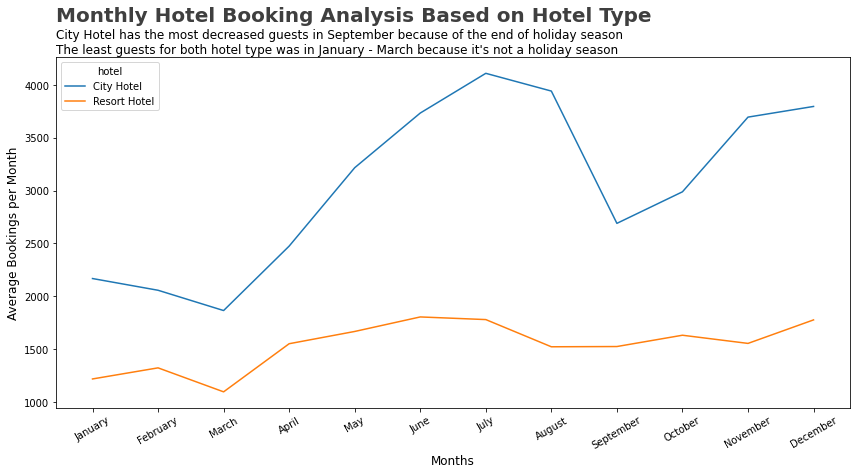

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='avg_bookings', data=df_grouped, hue='hotel')
plt.ylabel("Average Bookings per Month", fontsize = 12)
plt.xlabel("Months", fontsize = 12)
p = plt.xticks(rotation=30)
plt.tight_layout()
plt.text(x = -0.55, y = 4600, s = "Monthly Hotel Booking Analysis Based on Hotel Type",
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 4300, s = "City Hotel has the most decreased guests in September because of the end of holiday season \nThe least guests for both hotel type was in January - March because it's not a holiday season",
         size = 12)
plt.savefig('investigate_hotel_business_1.png', dpi=500)

#Correlation Between Canceled Booking Percentage by Total Booking Days

In [ ]:
df['days_stayed'] = df.stays_in_weekend_nights + df.stays_in_weekdays_nights
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer,days_stayed
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2


In [ ]:
#Grouping by hotel, aggregate sum and count is_canceled column to get percentage
df_duration = df.copy()
df_duration = df_duration.groupby(['hotel','days_stayed']).agg({'is_canceled' : ['sum','count']}).reset_index()
df_duration

hotel days_stayed is_canceled       
                                     sum  count
0     City Hotel           0          13    264
1     City Hotel           1        4103  13258
2     City Hotel           2       10432  21415
3     City Hotel           3        9482  21371
4     City Hotel           4        4853  12547
..           ...         ...         ...    ...
68  Resort Hotel          45           0      1
69  Resort Hotel          46           0      1
70  Resort Hotel          56           1      2
71  Resort Hotel          60           0      1
72  Resort Hotel          69           0      1

[73 rows x 4 columns]

In [ ]:
df_duration.columns = ['hotel','days_stayed','sum_canceled','n_canceled'] #Change column name

In [ ]:
#Make a day_stayed_group column
df_duration['day_stayed_group'] = np.where(df_duration['days_stayed'] > 20, '>20',
                                           np.where (df_duration['days_stayed'] >= 15, '15-20', df_duration['days_stayed']))
df_duration.sample(10)

,hotel,days_stayed,sum_canceled,n_canceled,day_stayed_group
23,City Hotel,23,1,2,>20
71,Resort Hotel,60,0,1,>20
51,Resort Hotel,17,1,12,15-20
45,Resort Hotel,11,74,314,11
43,Resort Hotel,9,220,628,9
28,City Hotel,28,3,3,>20
57,Resort Hotel,23,5,6,>20
29,City Hotel,29,10,10,>20
53,Resort Hotel,19,6,10,15-20
72,Resort Hotel,69,0,1,>20


In [ ]:
#Grouping by hotel and day_stayed_group, and aggregate by sum sum_canceled and n_canceled 
df_duration = df_duration.groupby(['hotel','day_stayed_group']).agg({'sum_canceled' : 'sum',
                                                                     'n_canceled' : 'sum'}).reset_index()

#Change column name
df_duration.columns = ['hotel','days_stayed_group','sum_canceled','n_canceled']

#Calculate canceled percentage
df_duration['canceled_pct'] = round(df_duration['sum_canceled'] / df_duration['n_canceled'] * 100, 2)

#Show dataset
df_duration

,hotel,days_stayed_group,sum_canceled,n_canceled,canceled_pct
0,City Hotel,0,13,264,4.92
1,City Hotel,1,4103,13258,30.95
2,City Hotel,10,116,196,59.18
3,City Hotel,11,46,79,58.23
4,City Hotel,12,30,63,47.62
5,City Hotel,13,26,41,63.41
6,City Hotel,14,71,97,73.20
7,City Hotel,15-20,67,95,70.53
8,City Hotel,2,10432,21415,48.71
9,City Hotel,3,9482,21371,44.37


In [ ]:
#Rearrange dataframe index to order the data by month
df_duration = df_duration.reindex([0,1,8,9,10,11,12,13,14,15,2,3,4,5,6,7,16,17,18,
                                 25,26,27,28,29,30,31,32,19,20,21,22,23,24,33]).reset_index()

In [ ]:
df_duration = df_duration.drop(columns=['index'], axis = 1) #Delete index column
df_duration#.head()

,hotel,days_stayed_group,sum_canceled,n_canceled,canceled_pct
0,City Hotel,0,13,264,4.92
1,City Hotel,1,4103,13258,30.95
2,City Hotel,2,10432,21415,48.71
3,City Hotel,3,9482,21371,44.37
4,City Hotel,4,4853,12547,38.68
5,City Hotel,5,1775,4985,35.61
6,City Hotel,6,938,2049,45.78
7,City Hotel,7,808,2053,39.36
8,City Hotel,8,176,381,46.19
9,City Hotel,9,93,212,43.87


In [ ]:
df_duration.to_csv('stays_duration_dataset.csv', index=False)

In [ ]:
df_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel              34 non-null     object 
 1   days_stayed_group  34 non-null     object 
 2   sum_canceled       34 non-null     int64  
 3   n_canceled         34 non-null     int64  
 4   canceled_pct       34 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


UFuncTypeError: ignored

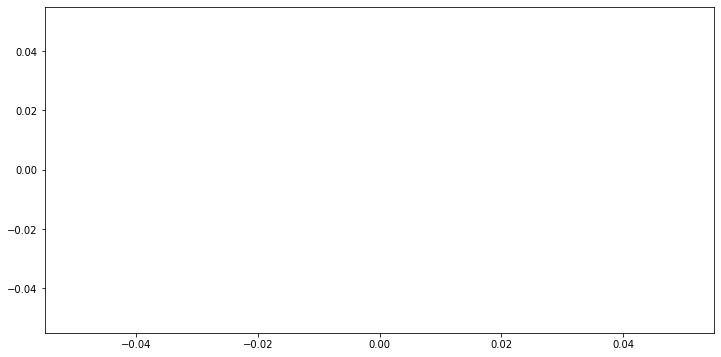

In [ ]:
plt.figure(figsize=(12,6))

x = df_duration['days_stayed_group']
y = df_duration['canceled_pct']
sns.regplot(x='days_stayed_group', y='canceled_pct', data=df_duration[df_duration['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='days_stayed_group', y='canceled_pct', data=df_duration[df_duration['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='days_stayed_group', y='canceled_pct', data=df_duration, hue='hotel')
plt.ylabel("Booking Canceled Percentage (%)", fontsize = 12)
plt.xlabel("Total Booking Days", fontsize = 12)

plt.tight_layout()
plt.text(x = -0.55, y = 103, s = "Correlation Between Canceled Booking Percentage by Total Booking Days",
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 95, s = "The longer days booked, the higher the booking being canceled percentage",
         size = 12)
plt.savefig('investigate_hotel_business_2.png', dpi=500)

# Lead Time to Cancellation Correlation

In [ ]:
df_lead = df.copy()
df_lead.head()

In [ ]:
# The data of lead_time is right skewed so we have to grouping the outliers dat
# In this case I choose > 400 as outliers, because as we can see start from 400 the total data of those numbers is not many
sns.histplot(x='lead_time', data=df_lead, bins=50)

In [ ]:
# Grouping the outliers data in one group, in this case I put in 401
df_lead['lead_times'] = np.where(df_lead['lead_time'] > 400, 401, df_lead['lead_time'])

In [ ]:
# Put the list of data that we will put in the chart later
bins = list(np.arange(0, max(df_lead['lead_times']+30),30))

# Name the labels
labels = ['{0}-{1}'.format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
# We put the format we made into {0}-{1}
# The format start with first number that we made in bins list will be put in {0}
# The {1} format will be put by value in next number, so on and so forth

# Next I make lead_time_group column
# We take the value by lead_times that we made before with bins we have made, and also labels that we have made
df_lead['lead_time_group'] = pd.cut(df_lead['lead_times'], include_lowest=True, bins=bins, labels=labels)

In [ ]:
df_lead['lead_time_group'].unique()

In [ ]:
df_lead[df_lead['lead_time_group'] == '330-360'].tail(15)

In [ ]:
df_lead = df_lead.groupby(['hotel','lead_time_group']).agg({'is_canceled' : ['sum','count']}).reset_index()
df_lead.columns = ['hotel','lead_time_group','sum_canceled','n_canceled']
df_lead.head(15)

In [ ]:
df_lead['canceled_pct'] = df_lead['sum_canceled'] / df_lead['n_canceled'] * 100

In [ ]:
df_lead.head(15)

In [ ]:
plt.figure(figsize=(15,10))

x = df_lead['lead_time_group']
y = df_lead['canceled_pct']
sns.barplot(x=x, y=y, data=df_lead, hue='hotel')
plt.ylabel("Booking Canceled Percentage (%)", fontsize = 12)
plt.xlabel("Lead Time Group", fontsize = 12)

plt.tight_layout()
plt.text(x = -0.55, y = 107, s = "Correlation Between Canceled Booking Percentage by Lead Time Booking Days",
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 103.5, s = "In lead times around 270-420 has high cancellation percentage. City hotel has a significant cancellation percentage increasing",
         size = 12)
plt.text(x = -0.55, y = 101, s = "Both hotel types has a very small cancellation percentage in 0-30 lead time days",
         size = 12)
plt.ylim(0,100)

plt.tight_layout()

plt.savefig('investigate_hotel_business_3.png', dpi=500)